# Tree tomography - November 11, 2023

~~frist post~~First analysis!

In [1]:
from datetime import datetime, timedelta
import json
import pytz

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
# pd.set_option('max_columns', 50)

mpl.style.use('ggplot')

%matplotlib inline

In [2]:
# The numbers are the cm marks on the 2x4 of Science
# FIXME: These are constants & should be upper case
dist_A_B = (80 - 35)
dist_A_C = (80 - 5)
dist_B_C = (35 - 5)

# FIXME: These are constants & should be upper case
trial_times_cols = ["A->B", "A->C", "B->C"]
velocity_cols = ['A->B cm_per_ms', 'A->C cm_per_ms', 'B->C cm_per_ms']

DATA_DIR = "../tree_tomography/data/experiments/2023-nov-11"

def load_and_munge_cols(csv_file, dir=DATA_DIR):
    """Do some data munging"""
    df = pd.read_csv(f"{dir}/{csv_file}")
    df.set_index("Trial")
    df["A->B cm_per_ms"] = dist_A_B / df["A->B"]
    df["A->C cm_per_ms"] = dist_A_C / df["A->C"]
    df["B->C cm_per_ms"] = dist_B_C / df["B->C"]
    return df

In [3]:
first_run = "first_run.csv"
second_run = "second_run.csv"
third_run = "third_run.csv"
fourth_run = "fourth_run.csv"
fifth_run = "fifth_run.csv"

df_1 = load_and_munge_cols(first_run)
df_2 = load_and_munge_cols(second_run)
df_3 = load_and_munge_cols(third_run)
df_4 = load_and_munge_cols(fourth_run)
df_5 = load_and_munge_cols(fifth_run)

<Axes: >

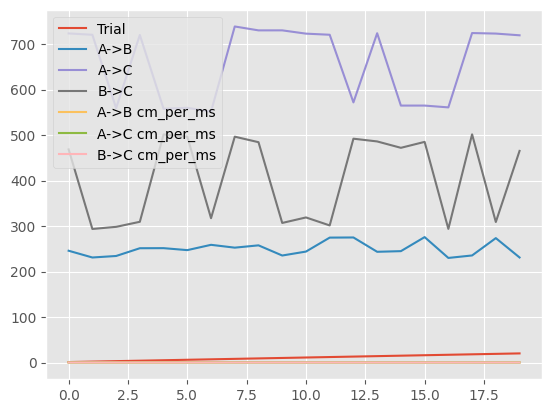

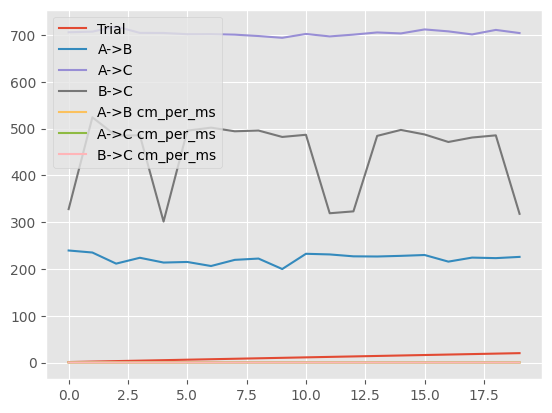

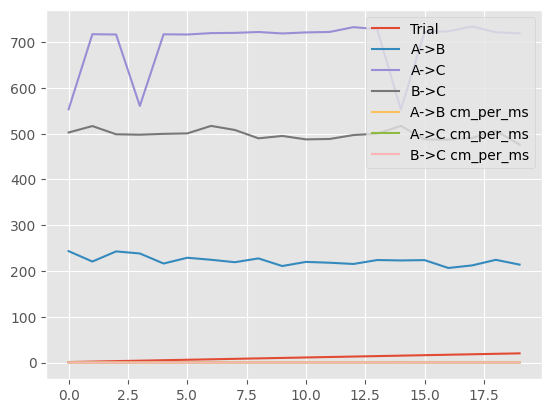

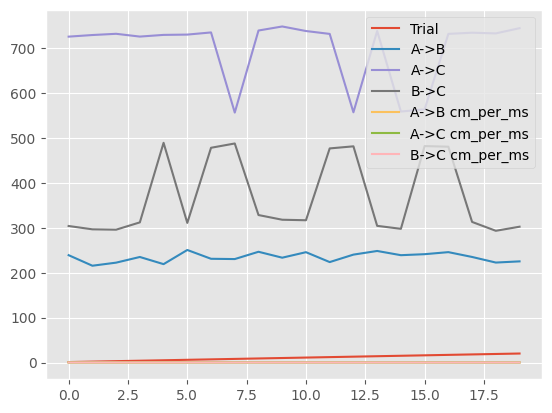

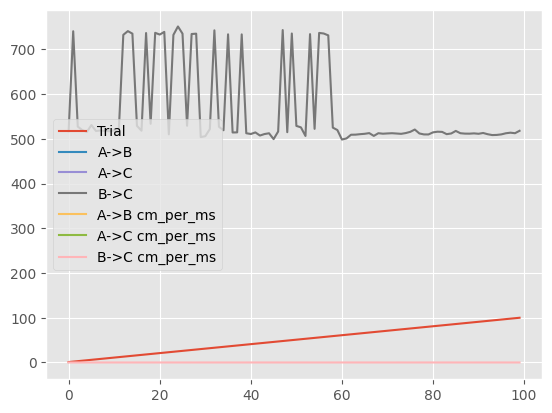

In [4]:
df_1.plot()
df_2.plot()
df_3.plot()
df_4.plot()
df_5.plot()

In [5]:
df_1.mean()

Trial              10.500000
A->B              249.488000
A->C              659.217000
B->C              404.726000
A->B cm_per_ms      0.181010
A->C cm_per_ms      0.115572
B->C cm_per_ms      0.078226
dtype: float64

In [6]:
df_2.mean()

Trial              10.500000
A->B              222.478000
A->C              704.133000
B->C              447.365000
A->B cm_per_ms      0.202655
A->C cm_per_ms      0.106520
B->C cm_per_ms      0.069510
dtype: float64

In [7]:
df_3.mean()

Trial              10.500000
A->B              222.675000
A->C              697.200000
B->C              498.266000
A->B cm_per_ms      0.202460
A->C cm_per_ms      0.108526
B->C cm_per_ms      0.060237
dtype: float64

In [8]:
df_4.mean()

Trial              10.500000
A->B              234.467000
A->C              699.132000
B->C              368.432000
A->B cm_per_ms      0.192294
A->C cm_per_ms      0.108564
B->C cm_per_ms      0.085328
dtype: float64

In [9]:
df_1.std()

Trial              5.916080
A->B              15.429884
A->C              82.305590
B->C              92.977662
A->B cm_per_ms     0.010917
A->C cm_per_ms     0.015186
B->C cm_per_ms     0.018822
dtype: float64

In [10]:
df_2.std()

Trial              5.916080
A->B               9.858873
A->C               5.486079
B->C              77.568314
A->B cm_per_ms     0.009235
A->C cm_per_ms     0.000826
B->C cm_per_ms     0.014905
dtype: float64

In [11]:
df_3.std()

Trial              5.916080
A->B               9.927524
A->C              61.207529
B->C              11.056414
A->B cm_per_ms     0.008795
A->C cm_per_ms     0.011427
B->C cm_per_ms     0.001333
dtype: float64

In [12]:
df_4.std()

Trial              5.916080
A->B              10.491826
A->C              72.081870
B->C              86.118288
A->B cm_per_ms     0.008696
A->C cm_per_ms     0.013155
B->C cm_per_ms     0.017597
dtype: float64

In [13]:
df_5.mean()

Trial              50.50000
A->B                    NaN
A->C                    NaN
B->C              563.36560
A->B cm_per_ms          NaN
A->C cm_per_ms          NaN
B->C cm_per_ms      0.05445
dtype: float64

In [14]:
all = pd.DataFrame()
all["first_run"] = df_1["A->B"]
all["second_run"] = df_2["A->B"]
all["third_run"] = df_3["A->B"]
all["fourth_run"] = df_4["A->B"]
all["fifth_run"] = df_5["A->B"]

<Axes: >

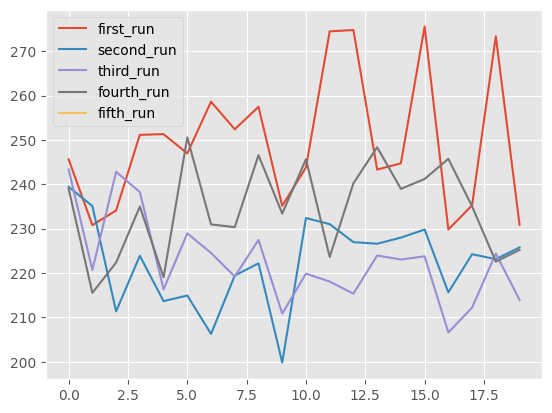

In [15]:
all.plot()


<Axes: >

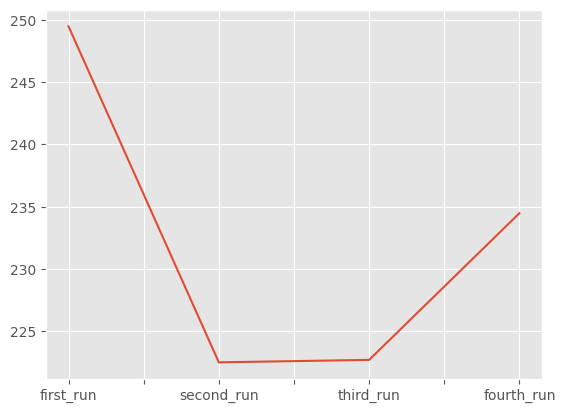

In [16]:
all.mean().plot()

In [17]:
def plot_trial_times(df):
    """Plot just the trial times"""
    df[trial_times_cols].plot()

def plot_velocities(df):
    """Plot just the velocities"""
    df[velocity_cols].plot()

A->B    15.429884
A->C    82.305590
B->C    92.977662
dtype: float64

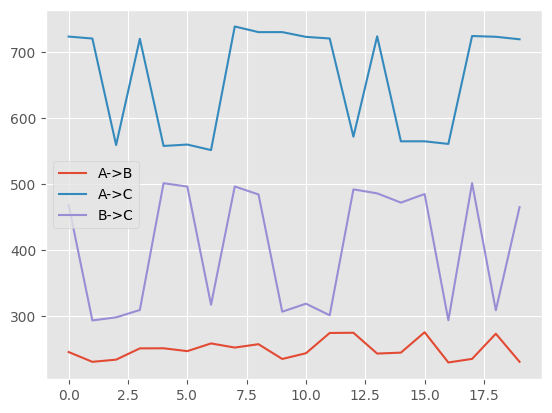

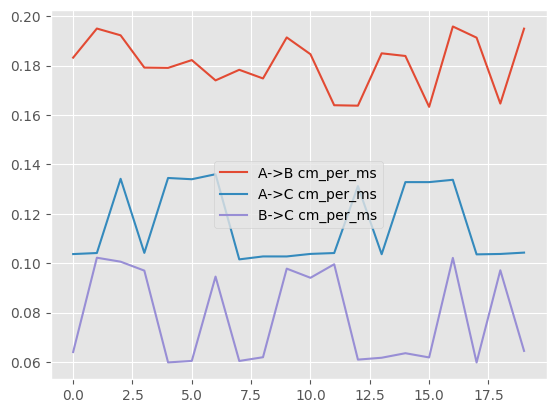

In [18]:
plot_trial_times(df_1)
plot_velocities(df_1)

df_1[trial_times_cols].std()

A->B     9.858873
A->C     5.486079
B->C    77.568314
dtype: float64

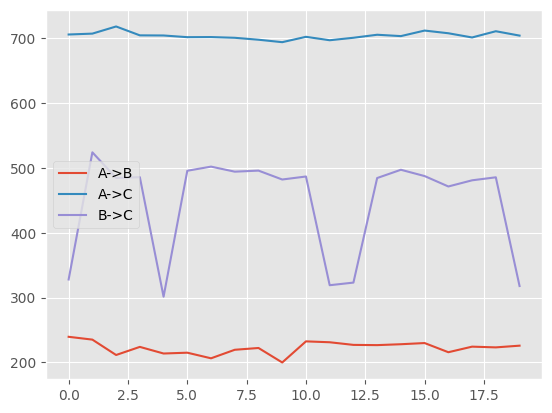

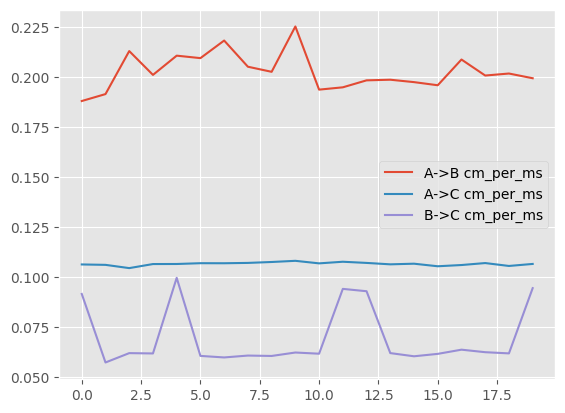

In [19]:
plot_trial_times(df_2)
plot_velocities(df_2)

df_2[trial_times_cols].std()

A->B     9.927524
A->C    61.207529
B->C    11.056414
dtype: float64

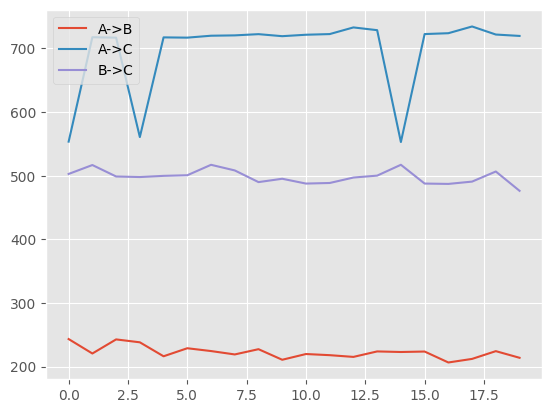

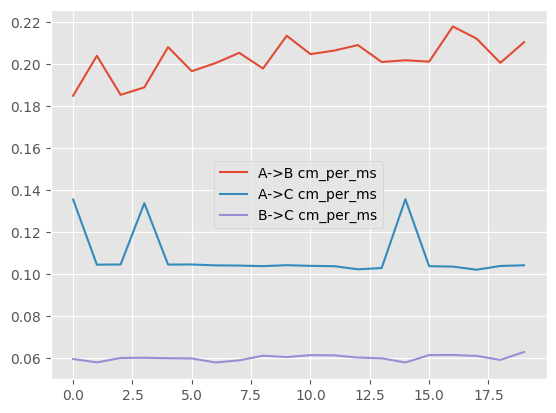

In [20]:
plot_trial_times(df_3)
plot_velocities(df_3)

df_3[trial_times_cols].std()

In [21]:
df_1[velocity_cols].std()
df_2[velocity_cols].std()
df_3[velocity_cols].std()

A->B cm_per_ms    0.008795
A->C cm_per_ms    0.011427
B->C cm_per_ms    0.001333
dtype: float64

In [22]:
all_data = pd.concat([df_1, df_2, df_3, df_4])
all_data.reset_index(inplace=True)

In [23]:
all_data

,index,Trial,A->B,A->C,B->C,A->B cm_per_ms,A->C cm_per_ms,B->C cm_per_ms
0,0,1,245.64,723.24,468.36,0.183195,0.103700,0.064053
1,1,2,230.80,720.28,293.48,0.194974,0.104126,0.102222
2,2,3,234.10,559.02,298.14,0.192226,0.134163,0.100624
3,3,4,251.16,719.88,309.26,0.179169,0.104184,0.097006
4,4,5,251.32,557.64,501.20,0.179055,0.134495,0.059856
...,...,...,...,...,...,...,...,...
75,15,16,241.20,563.68,481.96,0.186567,0.133054,0.062246
76,16,17,245.76,731.78,480.54,0.183105,0.102490,0.062430
77,17,18,235.02,734.38,313.04,0.191473,0.102127,0.095834
78,18,19,222.56,732.84,293.28,0.202193,0.102342,0.102291


<Axes: >

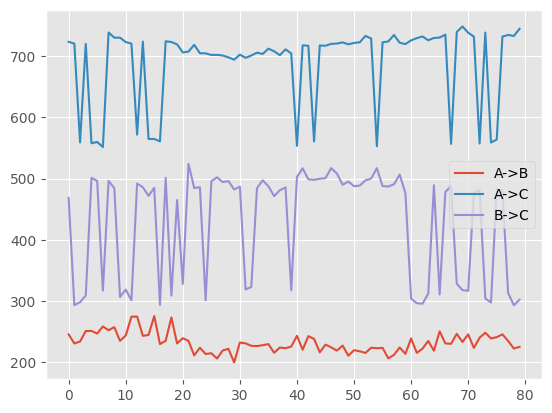

In [24]:
all_data[trial_times_cols].plot()

<Axes: >

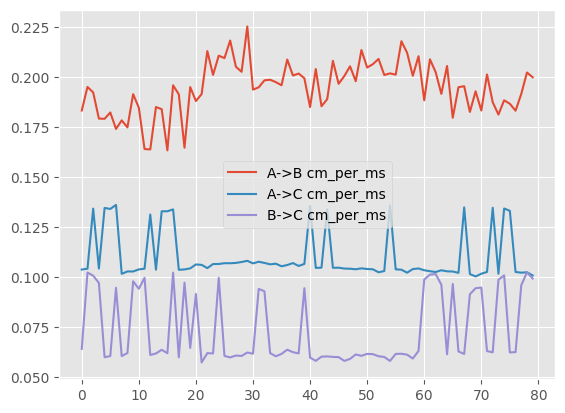

In [25]:
all_data[velocity_cols].plot()

In [26]:
def strip_plot(df, cols=trial_times_cols, x_label="segment"):
    """Adjust data & plot as strip plot.
    
    Adapted from https://stackoverflow.com/a/63977638
    """
    # columns means evaluation
    means = df[cols].mean(axis=0).to_list()
    print(means)
    print(means[0]+means[2], means[1])
    
    # dataframe reshaping
    df = pd.melt(frame=df[cols],
                 var_name=x_label,
                 value_name='value')
    
    # figure set-up
    fig, ax = plt.subplots()
    
    # dot-plot
    sns.stripplot(ax=ax,
                  data=df,
                  x=x_label,
                  y='value')
    
    
    # mean plot.  zorder is there to get the markers on top of the red circles.
    ax.plot(cols, means, color = 'black', marker='o', zorder=10, linestyle = '')

    # show figure
    plt.show()

[249.488, 659.217, 404.726]
654.2139999999999 659.217


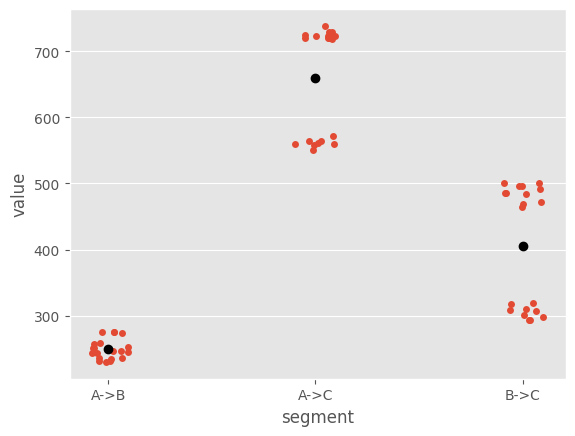

In [27]:
strip_plot(df_1)

[0.194604862383917, 0.1097956225881949, 0.07332528294835447]
0.26793014533227144 0.1097956225881949


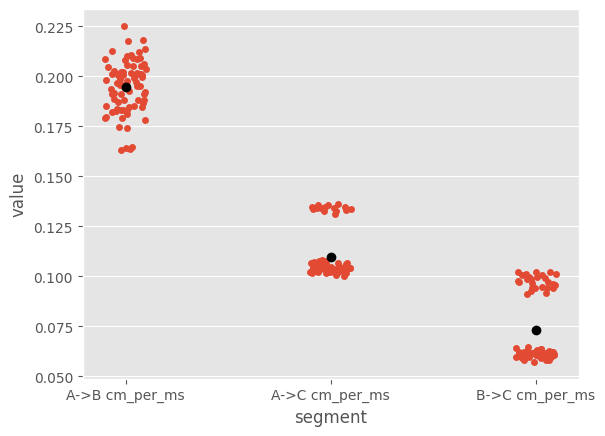

In [28]:
strip_plot(all_data, cols=velocity_cols)

[nan, nan, 563.3655999999999]
nan nan


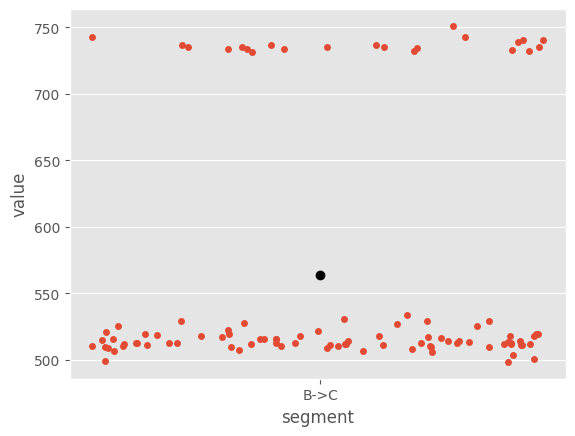

In [29]:
fifth_run = "fifth_run.csv"
df_5 = load_and_munge_cols(fifth_run)
strip_plot(df_5)

[nan, nan, 0.054450057257360296]
nan nan


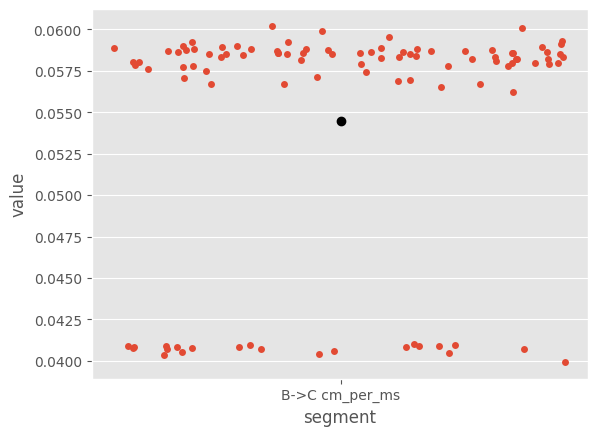

In [30]:
strip_plot(df_5, cols=velocity_cols)

<Axes: >

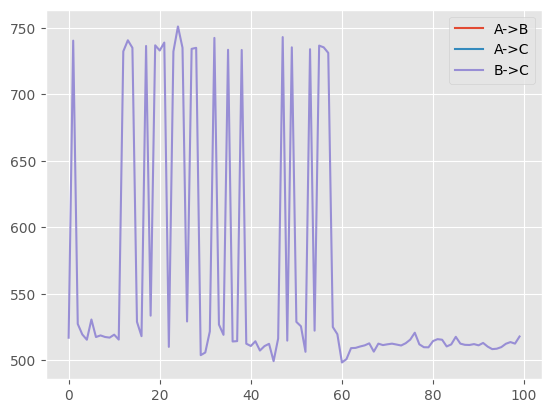

In [31]:
df_5[trial_times_cols].plot()

In [32]:
all_data[trial_times_cols].std()

A->B    15.958416
A->C    64.123466
B->C    87.844937
dtype: float64

In [33]:
df_5[trial_times_cols].std()

A->B          NaN
A->C          NaN
B->C    92.732563
dtype: float64

In [34]:
all_data[velocity_cols].mean()

A->B cm_per_ms    0.194605
A->C cm_per_ms    0.109796
B->C cm_per_ms    0.073325
dtype: float64

In [35]:
def convert_cm_per_ms_to_m_per_s(vel):
    """
    (1 cm / 1 ms) * (1 m / 100 cm) * (1000 ms / 1 s)
    -> 10 ms/s

    So multiply by 10.
    """
    return 10 * vel

convert_cm_per_ms_to_m_per_s(all_data[velocity_cols].mean())

A->B cm_per_ms    1.946049
A->C cm_per_ms    1.097956
B->C cm_per_ms    0.733253
dtype: float64

[nan, nan, 563.3655999999999]
nan nan


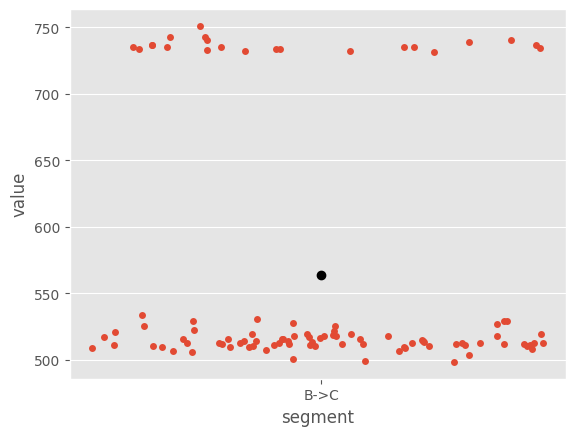

In [36]:
strip_plot(df_5)

[249.488, 659.217, 404.726]
654.2139999999999 659.217


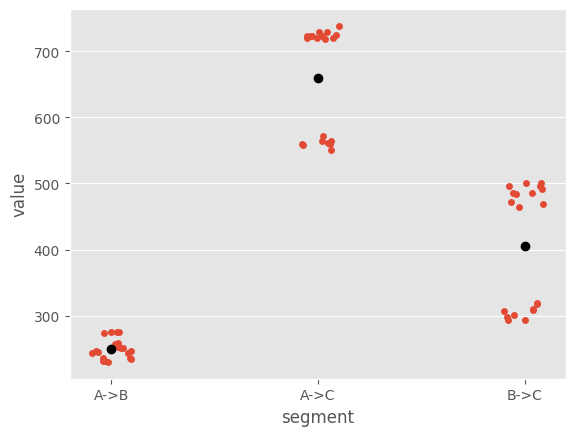

In [37]:
strip_plot(df_1)